<a href="https://colab.research.google.com/github/tanoManzo/mimic_trajectories/blob/dev/MIMIC_TRAJECTORY_embeddings_04_collect_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection, Embeddings and Attitude

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
notes_path = "/content/drive/MyDrive/NIH/Data/"

In [3]:
file_name = "ICUSTAYS.csv"
df_ward = pd.read_csv(notes_path+file_name)
subject_id_tsicu = df_ward[(df_ward['FIRST_CAREUNIT']=='TSICU') & (df_ward['LAST_CAREUNIT']=='TSICU')].SUBJECT_ID.unique()
print(f'Number of Subjects in TSICU: {len(subject_id_tsicu)}')

Number of Subjects in TSICU: 5418


In [4]:
file_name = "DIAGNOSES_ICD.csv"
df_icd = pd.read_csv(notes_path+file_name)
df_icd_first = df_icd[df_icd['SEQ_NUM']==1]
df_icd_first_tsicu = df_icd_first[df_icd_first['SUBJECT_ID'].isin(subject_id_tsicu)]
print(f'Number of unique ICD 9 first sequence from TCICU subject: {df_icd_first_tsicu.ICD9_CODE.nunique()}')
icd_tsicu = df_icd_first_tsicu.ICD9_CODE.value_counts().nlargest(5)
print('Top 5 Popular ICD9 in the TSICU population with duplicates:')
print("code  #subjects")
icd_tsicu

Number of unique ICD 9 first sequence from TCICU subject: 1387
Top 5 Popular ICD9 in the TSICU population with duplicates:
code  #subjects


431      190
0389     164
85221    103
51881     81
430       79
Name: ICD9_CODE, dtype: int64

In [63]:
condition = []
for item in df_icd_first['ICD9_CODE'].values:
  if item.isdigit():
    item = float(item)
    if (item>799 and item<900):
      condition.append(True)
    else: 
      condition.append(False)
  else:
      condition.append(False)


icd8xxfirst_subjects_ids = df_icd_first[condition]['SUBJECT_ID'].unique()
print(f'Number of subjects with a first sequence ICD 9 code [800,900) : {len(icd8xxfirst_subjects_ids)}')

Number of subjects with a first sequence ICD 9 code [800,900) : 154


In [47]:
patients = "PATIENTS.csv"
df_patients = pd.read_csv(notes_path+patients)
df_patients_icd8xx_tsicu = df_patients[df_patients['SUBJECT_ID'].isin(icd8xxfirst_subjects_ids)]

print('Subjects Expired (1), Alive (0): ')
print(df_patients_icd8xx_tsicu['EXPIRE_FLAG'].value_counts())
print(df_patients_icd8xx_tsicu['GENDER'].value_counts())

Subjects Expired (1), Alive (0): 
1    87
0    67
Name: EXPIRE_FLAG, dtype: int64
F    87
M    67
Name: GENDER, dtype: int64


In [10]:
note_events = "NOTEEVENTS.csv"
df_note_events = pd.read_csv(notes_path+note_events)
df_note_events.info()

<ipython-input-10-8fd00f55f791>:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_note_events = pd.read_csv(notes_path+note_events)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


In [50]:
df_note_icd8xx_tsicu = df_note_events[df_note_events['SUBJECT_ID'].isin(icd8xxfirst_subjects_ids)]
print(f'Number of total notes: {len(df_note_icdxxx_tsicu)}')
df_nursing_progress_note_icd8xx_tsicu = df_note_icdxxx_tsicu[df_note_icdxxx_tsicu['DESCRIPTION']=='Nursing Progress Note']
print(f'Number of Nursing Progress Notes: {len(df_nursing_progress_note_icd8xx_tsicu)}')
df_discharge_note_icd8xx_tsicu = df_note_icd8xx_tsicu[df_note_icd8xx_tsicu['CATEGORY']=='Discharge summary']
print(f'Number of Discharge summary: {len(df_discharge_note_icd8xx_tsicu)}')

Number of total notes: 18648
Number of Nursing Progress Notes: 4317
Number of Discharge summary: 439


In [53]:
cgid_icd8xx_tsicu = df_nursing_progress_note_icd8xx_tsicu['CGID'].unique()
print(f'Number of caregivers: {len(cgid_maxicu_tsicu)}')

Number of caregivers: 251


In [54]:
caregivers = "CAREGIVERS.csv"
df_caregivers = pd.read_csv(notes_path+caregivers)
df_caregivers[df_caregivers['CGID'].isin(cgid_icd8xx_tsicu)].LABEL.value_counts()

RN      237
RNs       4
Rn        3
PCT       2
Nurs      1
CoRN      1
rn        1
Res       1
MS        1
Name: LABEL, dtype: int64

In [55]:
name_file= "ADMISSIONS.csv"
df_adm = pd.read_csv(notes_path+name_file)
df_adm_icd8xx_tsicu = df_adm[df_adm['SUBJECT_ID'].isin(cgid_icd8xx_tsicu)]
df_adm_icd8xx_tsicu

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
14285,17998,14714,142710,2150-03-07 21:50:00,2150-03-14 19:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,SPAN,CATHOLIC,DIVORCED,HISPANIC/LATINO - PUERTO RICAN,2150-03-07 18:00:00,2150-03-07 22:50:00,FEVER,0,0
14286,17999,14714,115276,2151-01-12 17:35:00,2151-01-19 17:16:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,SPAN,CATHOLIC,DIVORCED,HISPANIC/LATINO - PUERTO RICAN,2151-01-12 12:57:00,2151-01-12 19:57:00,HYPOTENSION,0,1
14293,18006,14719,106692,2125-12-03 13:00:00,2125-12-20 12:44:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,NaN,CATHOLIC,WIDOWED,WHITE,NaN,NaN,CAROTID STENOSIS,0,1
14853,17902,14626,148547,2190-07-16 07:15:00,2190-07-22 17:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,OTHER,MARRIED,PATIENT DECLINED TO ANSWER,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
15023,17936,14657,111125,2200-07-05 19:37:00,2200-07-11 10:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Self Pay,NaN,OTHER,DIVORCED,UNKNOWN/NOT SPECIFIED,2200-07-05 15:43:00,2200-07-05 21:00:00,LUMBAR FRACTURE,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27638,26001,21297,134084,2111-08-21 08:46:00,2111-08-25 11:20:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,UNOBTAINABLE,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,NEWBORN,0,0
27639,26002,21297,111349,2111-08-26 16:35:00,2111-08-29 18:00:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,UNOBTAINABLE,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,HYPERBILIRUBINEMIA,0,1
27737,26233,21476,176844,2102-09-20 14:56:00,2102-09-23 19:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,PROTESTANT QUAKER,SEPARATED,BLACK/AFRICAN AMERICAN,2102-09-20 11:45:00,2102-09-20 16:07:00,STROKE;TELEMETRY,0,1
28046,26196,21452,108178,2119-01-26 18:12:00,2119-02-13 11:13:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,NaN,CATHOLIC,MARRIED,WHITE,2119-01-26 13:56:00,2119-01-26 19:38:00,R/O OBSTRUCTION-ABDOMINAL PAIN,0,1


Report

In [64]:
print(f'Number of Subjects in TSICU: {len(subject_id_tsicu)}')
print(f'Number of subjects with a first sequence ICD 9 code [800,900) : {len(icd8xxfirst_subjects_ids)}')
print('')
print('Subjects Expired (1), Alive (0): ')
print(df_patients_icd8xx_tsicu['EXPIRE_FLAG'].value_counts())
print('')
print('Gender:')
print(df_patients_icd8xx_tsicu['GENDER'].value_counts())
print('')
print(f'Number of total notes: {len(df_note_icdxxx_tsicu)}')
print(f'Number of Nursing Progress Notes: {len(df_nursing_progress_note_icd8xx_tsicu)}')
print(f'Number of Discharge summary: {len(df_discharge_note_icd8xx_tsicu)}')
print(f'Number of caregivers: {len(cgid_maxicu_tsicu)}')

Number of Subjects in TSICU: 5418
Number of subjects with a first sequence ICD 9 code [800,900) : 154

Subjects Expired (1), Alive (0): 
1    87
0    67
Name: EXPIRE_FLAG, dtype: int64

Gender:
F    87
M    67
Name: GENDER, dtype: int64

Number of total notes: 18648
Number of Nursing Progress Notes: 4317
Number of Discharge summary: 439
Number of caregivers: 251


# END


In [ ]:
print(df_note_events['CATEGORY'].unique())

['Discharge summary' 'Echo' 'ECG' 'Nursing' 'Physician ' 'Rehab Services'
 'Case Management ' 'Respiratory ' 'Nutrition' 'General' 'Social Work'
 'Pharmacy' 'Consult' 'Radiology' 'Nursing/other']


## **Data Preprocessing**

In [ ]:
df_note_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


Grab tsicu notes, merge with ward and patients tables

In [ ]:
# get new type of notes (TSICU)
df_notes_TSICU = pd.DataFrame()
#df_notes_TSICU = df_notes.merge(df_note_events[['ROW_ID', 'CATEGORY']], on='ROW_ID')
df_notes_TSICU = df_note_events.merge(df_caregivers.drop('ROW_ID', axis=1), on='CGID')
#df_notes_TSICU = df_notes_TSICU.merge(df_ward.drop('ROW_ID', axis=1), on='SUBJECT_ID')
df_notes_TSICU = df_notes_TSICU.merge(df_patients.drop('ROW_ID', axis=1), on='SUBJECT_ID')
#df_notes_TSICU = df_notes_TSICU[(df_notes_TSICU['first_careunit'] == 'TSICU') & (df_notes_TSICU['last_careunit'] == 'TSICU')].drop_duplicates()
df_notes_TSICU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246404 entries, 0 to 1246403
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ROW_ID         1246404 non-null  int64  
 1   SUBJECT_ID     1246404 non-null  int64  
 2   HADM_ID        1240545 non-null  float64
 3   CHARTDATE      1246404 non-null  object 
 4   CHARTTIME      1244335 non-null  object 
 5   STORETIME      1246404 non-null  object 
 6   CATEGORY       1246404 non-null  object 
 7   DESCRIPTION_x  1246404 non-null  object 
 8   CGID           1246404 non-null  float64
 9   ISERROR        886 non-null      float64
 10  TEXT           1246404 non-null  object 
 11  LABEL          1212686 non-null  object 
 12  DESCRIPTION_y  853491 non-null   object 
 13  GENDER         1246404 non-null  object 
 14  DOB            1246404 non-null  object 
 15  DOD            485473 non-null   object 
 16  DOD_HOSP       336532 non-null   object 
 17  DOD_SSN 

In [ ]:
df_notes_TSICU.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION_x,CGID,ISERROR,TEXT,LABEL,DESCRIPTION_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,316234,29075,179159.0,2116-02-07,2116-02-07 14:08:00,2116-02-07 14:08:20,Nursing,Nursing Transfer Note,20808.0,NaN,"67M w/ h/o multiplemyeloma Dx [**2111**], neur...",RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1
1,316140,29075,179159.0,2116-02-06,2116-02-06 05:06:00,2116-02-06 08:36:56,Nursing,Nursing Transfer Note,20808.0,1.0,.H/O back pain\n Assessment:\n Action:\n ...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1
2,316249,29075,179159.0,2116-02-07,2116-02-07 17:21:00,2116-02-07 17:21:31,Nursing,Nursing Progress Note,20808.0,NaN,"Gastrointestinal bleed, lower (Hematochezia, B...",RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1
3,316183,29075,179159.0,2116-02-06,2116-02-06 16:52:00,2116-02-06 16:52:53,Nursing,Nursing Progress Note,20808.0,NaN,.H/O back pain\n Assessment:\n c/o back pa...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1
4,316238,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 15:37:10,Physician,Physician Resident Progress Note,21203.0,NaN,Chief Complaint:\n 24 Hour Events:\n EGD d...,MD,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1


Join with ICD

In [ ]:
icd = "DIAGNOSES_ICD.csv"
df_icd = pd.read_csv(notes_path+icd)
df_icd.columns = df_icd.columns.str.upper()
df_icd = df_icd.dropna(subset=['SEQ_NUM'])
df_icd['SEQ_NUM'] = df_icd['SEQ_NUM'].astype(int)
unique_values = df_icd['SEQ_NUM'].unique()
print("unique_values: ")
print(unique_values)
idx = df_icd.groupby(['HADM_ID', 'SUBJECT_ID'])['SEQ_NUM'].idxmin()
df_icd = df_icd.loc[idx]
df_icd.info()

unique_values: 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58929 entries, 462245 to 374673
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ROW_ID      58929 non-null  int64 
 1   SUBJECT_ID  58929 non-null  int64 
 2   HADM_ID     58929 non-null  int64 
 3   SEQ_NUM     58929 non-null  int64 
 4   ICD9_CODE   58929 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.7+ MB


In [ ]:
df_notes_TSICU = df_notes_TSICU.merge(df_icd[['HADM_ID','ICD9_CODE','SEQ_NUM', 'SUBJECT_ID']], on=['HADM_ID', 'SUBJECT_ID'])
df_notes_TSICU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1240477 entries, 0 to 1240476
Data columns (total 21 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ROW_ID         1240477 non-null  int64  
 1   SUBJECT_ID     1240477 non-null  int64  
 2   HADM_ID        1240477 non-null  float64
 3   CHARTDATE      1240477 non-null  object 
 4   CHARTTIME      1240477 non-null  object 
 5   STORETIME      1240477 non-null  object 
 6   CATEGORY       1240477 non-null  object 
 7   DESCRIPTION_x  1240477 non-null  object 
 8   CGID           1240477 non-null  float64
 9   ISERROR        879 non-null      float64
 10  TEXT           1240477 non-null  object 
 11  LABEL          1206875 non-null  object 
 12  DESCRIPTION_y  847984 non-null   object 
 13  GENDER         1240477 non-null  object 
 14  DOB            1240477 non-null  object 
 15  DOD            482275 non-null   object 
 16  DOD_HOSP       333983 non-null   object 
 17  DOD_SSN 

In [ ]:
df_notes_TSICU.head(20)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION_x,CGID,ISERROR,...,LABEL,DESCRIPTION_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ICD9_CODE,SEQ_NUM
0,316234,29075,179159.0,2116-02-07,2116-02-07 14:08:00,2116-02-07 14:08:20,Nursing,Nursing Transfer Note,20808.0,NaN,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
1,316140,29075,179159.0,2116-02-06,2116-02-06 05:06:00,2116-02-06 08:36:56,Nursing,Nursing Transfer Note,20808.0,1.0,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
2,316249,29075,179159.0,2116-02-07,2116-02-07 17:21:00,2116-02-07 17:21:31,Nursing,Nursing Progress Note,20808.0,NaN,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
3,316183,29075,179159.0,2116-02-06,2116-02-06 16:52:00,2116-02-06 16:52:53,Nursing,Nursing Progress Note,20808.0,NaN,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
4,316238,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 15:37:10,Physician,Physician Resident Progress Note,21203.0,NaN,...,MD,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
5,316241,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 16:05:26,Physician,Physician Resident Progress Note,21203.0,NaN,...,MD,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
6,316242,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 16:08:06,Physician,Physician Resident Progress Note,21203.0,NaN,...,MD,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
7,316124,29075,179159.0,2116-02-06,2116-02-06 05:03:00,2116-02-06 06:58:35,Nursing,Nursing Progress Note,14419.0,NaN,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
8,316113,29075,179159.0,2116-02-06,2116-02-06 05:03:00,2116-02-06 05:03:29,Nursing,Nursing Progress Note,14419.0,NaN,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
9,316114,29075,179159.0,2116-02-06,2116-02-06 05:03:00,2116-02-06 05:05:39,Nursing,Nursing Progress Note,14419.0,NaN,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1


In [ ]:
grouping = df_notes_TSICU.groupby(['CGID','SUBJECT_ID']).size()
df_notes_TSICU['num_of_notes'] = df_notes_TSICU.set_index(['CGID','SUBJECT_ID']).index.map(grouping)
df_notes_TSICU_filtered = df_notes_TSICU[df_notes_TSICU['num_of_notes'] > 1]
df_notes_TSICU_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999592 entries, 0 to 1240437
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ROW_ID         999592 non-null  int64  
 1   SUBJECT_ID     999592 non-null  int64  
 2   HADM_ID        999592 non-null  float64
 3   CHARTDATE      999592 non-null  object 
 4   CHARTTIME      999592 non-null  object 
 5   STORETIME      999592 non-null  object 
 6   CATEGORY       999592 non-null  object 
 7   DESCRIPTION_x  999592 non-null  object 
 8   CGID           999592 non-null  float64
 9   ISERROR        860 non-null     float64
 10  TEXT           999592 non-null  object 
 11  LABEL          967855 non-null  object 
 12  DESCRIPTION_y  690997 non-null  object 
 13  GENDER         999592 non-null  object 
 14  DOB            999592 non-null  object 
 15  DOD            392445 non-null  object 
 16  DOD_HOSP       276056 non-null  object 
 17  DOD_SSN        328635 non-nu

In [ ]:
df_notes_TSICU_filtered.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION_x,CGID,ISERROR,...,DESCRIPTION_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ICD9_CODE,SEQ_NUM,num_of_notes
0,316234,29075,179159.0,2116-02-07,2116-02-07 14:08:00,2116-02-07 14:08:20,Nursing,Nursing Transfer Note,20808.0,NaN,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4
1,316140,29075,179159.0,2116-02-06,2116-02-06 05:06:00,2116-02-06 08:36:56,Nursing,Nursing Transfer Note,20808.0,1.0,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4
2,316249,29075,179159.0,2116-02-07,2116-02-07 17:21:00,2116-02-07 17:21:31,Nursing,Nursing Progress Note,20808.0,NaN,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4
3,316183,29075,179159.0,2116-02-06,2116-02-06 16:52:00,2116-02-06 16:52:53,Nursing,Nursing Progress Note,20808.0,NaN,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4
4,316238,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 15:37:10,Physician,Physician Resident Progress Note,21203.0,NaN,...,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,3
5,316241,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 16:05:26,Physician,Physician Resident Progress Note,21203.0,NaN,...,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,3
6,316242,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 16:08:06,Physician,Physician Resident Progress Note,21203.0,NaN,...,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,3
7,316124,29075,179159.0,2116-02-06,2116-02-06 05:03:00,2116-02-06 06:58:35,Nursing,Nursing Progress Note,14419.0,NaN,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4
8,316113,29075,179159.0,2116-02-06,2116-02-06 05:03:00,2116-02-06 05:03:29,Nursing,Nursing Progress Note,14419.0,NaN,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4
9,316114,29075,179159.0,2116-02-06,2116-02-06 05:03:00,2116-02-06 05:05:39,Nursing,Nursing Progress Note,14419.0,NaN,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4


Filter by number of notes

number of notes: min=1, max=122367, mean=454.7734303912648,  median=48.0


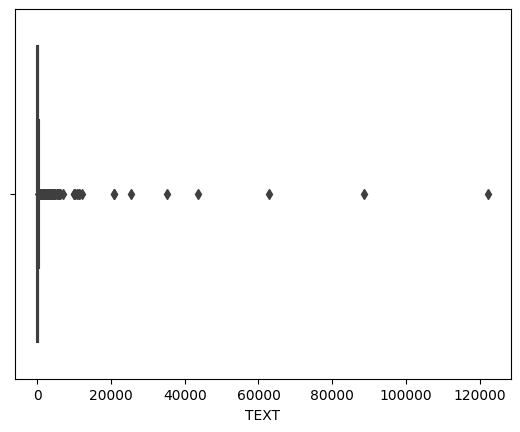

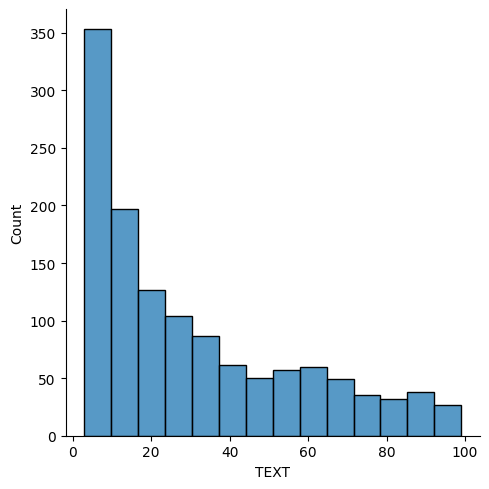

In [ ]:
gb_notes = df_notes_TSICU_filtered.groupby(['ICD9_CODE'])
num_notes = gb_notes['TEXT'].count()

print(f'number of notes: min={num_notes.min()}, max={num_notes.max()}, mean={num_notes.mean()},  median={num_notes.median()}')
sns.boxplot(x=num_notes)
sns.displot(num_notes[((num_notes>2) & (num_notes<100))])

In [ ]:
df_notes_TSICU_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999592 entries, 0 to 1240437
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ROW_ID         999592 non-null  int64  
 1   SUBJECT_ID     999592 non-null  int64  
 2   HADM_ID        999592 non-null  float64
 3   CHARTDATE      999592 non-null  object 
 4   CHARTTIME      999592 non-null  object 
 5   STORETIME      999592 non-null  object 
 6   CATEGORY       999592 non-null  object 
 7   DESCRIPTION_x  999592 non-null  object 
 8   CGID           999592 non-null  float64
 9   ISERROR        860 non-null     float64
 10  TEXT           999592 non-null  object 
 11  LABEL          967855 non-null  object 
 12  DESCRIPTION_y  690997 non-null  object 
 13  GENDER         999592 non-null  object 
 14  DOB            999592 non-null  object 
 15  DOD            392445 non-null  object 
 16  DOD_HOSP       276056 non-null  object 
 17  DOD_SSN        328635 non-nu

In [ ]:
icd9_grouping = df_notes_TSICU_filtered.groupby(['ICD9_CODE']).size()
df_notes_TSICU_filtered['num_of_conditions'] = df_notes_TSICU_filtered.set_index(['ICD9_CODE']).index.map(icd9_grouping)
#df_notes_TSICU_filtered = df_notes_TSICU_filtered[(df_notes_TSICU_filtered['num_of_conditions'] >= 15) & (df_notes_TSICU_filtered['num_of_conditions'] <= 1000)]
#df_notes_TSICU_filtered = df_notes_TSICU_filtered[(df_notes_TSICU_filtered['num_of_conditions'] >= 15) & (df_notes_TSICU_filtered['num_of_conditions'] <= 100)]
df_notes_TSICU_filtered.info()
print(icd9_grouping)

<ipython-input-23-2f58a0fcdd04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notes_TSICU_filtered['num_of_conditions'] = df_notes_TSICU_filtered.set_index(['ICD9_CODE']).index.map(icd9_grouping)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 999592 entries, 0 to 1240437
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ROW_ID             999592 non-null  int64  
 1   SUBJECT_ID         999592 non-null  int64  
 2   HADM_ID            999592 non-null  float64
 3   CHARTDATE          999592 non-null  object 
 4   CHARTTIME          999592 non-null  object 
 5   STORETIME          999592 non-null  object 
 6   CATEGORY           999592 non-null  object 
 7   DESCRIPTION_x      999592 non-null  object 
 8   CGID               999592 non-null  float64
 9   ISERROR            860 non-null     float64
 10  TEXT               999592 non-null  object 
 11  LABEL              967855 non-null  object 
 12  DESCRIPTION_y      690997 non-null  object 
 13  GENDER             999592 non-null  object 
 14  DOB                999592 non-null  object 
 15  DOD                392445 non-null  object 
 16  D

In [ ]:
df_notes_TSICU_dropped_cols = df_notes_TSICU_filtered.drop(['STORETIME','CHARTDATE','CHARTTIME','DOB','DOD','DOD_HOSP','DOD_SSN'], axis=1)
df_notes_TSICU_dropped_cols.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CATEGORY', 'DESCRIPTION_x', 'CGID',
       'ISERROR', 'TEXT', 'LABEL', 'DESCRIPTION_y', 'GENDER', 'EXPIRE_FLAG',
       'ICD9_CODE', 'SEQ_NUM', 'num_of_notes', 'num_of_conditions'],
      dtype='object')

select emotional words then filter rows that dont have a minimum number of them

In [ ]:
def filter_for_emotional_words(df):
  selected_words = ['pain', 'family', 'stable', 'care', 'well', 'social', 'support', 'able', 'decreased', 'warm', 'unable', 'strong', 'intact', 'good', 'times', 'aware', 'eyes', 'tolerated', 'denies', 'tolerating', 'please', 'palpable']
  print("selected_words list length: ", len(selected_words))
  pattern = '|'.join(selected_words)
  new_df = df[df['TEXT'].str.contains(pattern, regex=True)].copy()
  #filtered_data = df_notes_TSICU[df_notes_TSICU['TEXT'].str.contains(pattern, regex=True)].copy()
  new_df['num_search_words'] = new_df['TEXT'].str.count(pattern)
  #new_df = new_df[new_df['num_search_words'] >= 0]
  new_df.info()
  return new_df

In [ ]:
#filtered_data = filter_for_emotional_words(df_notes_TSICU_dropped_cols)
filtered_data = df_notes_TSICU_dropped_cols

Random selection from sample set

In [ ]:
#random_filtered_data = filtered_data.sample(n=50000, random_state=42)
random_filtered_data = filtered_data

Remove similar sentences

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def remove_similar_notes(df):
  sentences = df['TEXT'].tolist()
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform(sentences)
  similarity_threshold = 0.8

  similar_indices = []
  for i, sentence in enumerate(sentences):  # needs to be max 1000 entries
    if any(cosine_similarity(tfidf_matrix[i], tfidf_matrix[j])[0][0] > similarity_threshold for j in range(i)):  # very slow ~10 minutes for 1000 entries, exponential complexity (more than 5 hours if 6000 entries)
      similar_indices.append(i)
  index_labels = df.index[similar_indices]
  df.drop(index_labels, inplace=True)
  return df

Inverse Document Frequency

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_notes_TSICU['TEXT'])

feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
word_score_dict = dict(zip(feature_names, tfidf_scores))

sorted_words = sorted(word_score_dict.items(), key=lambda x: x[1], reverse=True)

top_words = sorted_words[:50]

KeyboardInterrupt: ignored

In [ ]:
print("Rank\tWord\t\t\tCount")
for rank, (word, score) in enumerate(top_words, start=1):
  print(f"{rank}\t{word.ljust(20)}\t{score}")

Rank	Word			Count


NameError: ignored

In [ ]:
#random_filtered_data = remove_similar_notes(random_filtered_data)
random_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999592 entries, 0 to 1240437
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ROW_ID             999592 non-null  int64  
 1   SUBJECT_ID         999592 non-null  int64  
 2   HADM_ID            999592 non-null  float64
 3   CATEGORY           999592 non-null  object 
 4   DESCRIPTION_x      999592 non-null  object 
 5   CGID               999592 non-null  float64
 6   ISERROR            860 non-null     float64
 7   TEXT               999592 non-null  object 
 8   LABEL              967855 non-null  object 
 9   DESCRIPTION_y      690997 non-null  object 
 10  GENDER             999592 non-null  object 
 11  EXPIRE_FLAG        999592 non-null  int64  
 12  ICD9_CODE          999592 non-null  object 
 13  SEQ_NUM            999592 non-null  int64  
 14  num_of_notes       999592 non-null  int64  
 15  num_of_conditions  999592 non-null  int64  
dtypes

Find matching conditions for both expired flags

In [ ]:
def split_set_half_expired(df):
  df['EXPIRE_FLAG'] = df['EXPIRE_FLAG'].astype(int)
  group_conditions = df.groupby(['ICD9_CODE', 'EXPIRE_FLAG'])
  def balance_conditions(g1,g2,size):
    size = min(len(g1), len(g2), size)
    return g1.sample(n=size, random_state=1), g2.sample(n=size, random_state=1)

  rows = []
  size = 50000

  for drg_desc, group in group_conditions:
    icd9, expire = drg_desc
    if (icd9, 1-expire) in group_conditions.groups:
      paired_group = group_conditions.get_group((icd9, 1-expire))
      group_sample1, group_sample2 = balance_conditions(group, paired_group, size)
      rows.append(group_sample1)
      rows.append(group_sample2)
      size -= len(group_sample1)
    if size <= 0:
      break

  new_df = pd.concat(rows)
  new_df = new_df.drop_duplicates()

  new_df.info()
  #print(new_df[['ICD9_CODE', 'EXPIRE_FLAG']])
  return new_df

  #valid_groups = [key for key, group in group_conditions.groups.keys() if (key[0], key[1], 1 - key[2]) in group_conditions.groups]
  #for key in valid_groups:
    #pass

In [ ]:
#balanced_data = split_set_half_expired(random_filtered_data)
balanced_data = random_filtered_data

Display notes

In [ ]:
pd.set_option('display.max_colwidth', 250)
pd.set_option('display.max_rows', None)
#print(balanced_data['TEXT'].head(200))
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

In [ ]:
print(balanced_data.columns)
print('\n'+"Number of rows: "+str(len(balanced_data)))

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CATEGORY', 'DESCRIPTION_x', 'CGID',
       'ISERROR', 'TEXT', 'LABEL', 'DESCRIPTION_y', 'GENDER', 'EXPIRE_FLAG',
       'ICD9_CODE', 'SEQ_NUM', 'num_of_notes', 'num_of_conditions'],
      dtype='object')

Number of rows: 999592


In [ ]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999592 entries, 0 to 1240437
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ROW_ID             999592 non-null  int64  
 1   SUBJECT_ID         999592 non-null  int64  
 2   HADM_ID            999592 non-null  float64
 3   CATEGORY           999592 non-null  object 
 4   DESCRIPTION_x      999592 non-null  object 
 5   CGID               999592 non-null  float64
 6   ISERROR            860 non-null     float64
 7   TEXT               999592 non-null  object 
 8   LABEL              967855 non-null  object 
 9   DESCRIPTION_y      690997 non-null  object 
 10  GENDER             999592 non-null  object 
 11  EXPIRE_FLAG        999592 non-null  int64  
 12  ICD9_CODE          999592 non-null  object 
 13  SEQ_NUM            999592 non-null  int64  
 14  num_of_notes       999592 non-null  int64  
 15  num_of_conditions  999592 non-null  int64  
dtypes

In [ ]:
no_duplicates = balanced_data.sort_values('ROW_ID').drop_duplicates(subset=['CGID', 'SUBJECT_ID'])  
no_duplicates = no_duplicates.drop(['TEXT'], axis=1)  # removes text notes
no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240122 entries, 288502 to 1183477
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ROW_ID             240122 non-null  int64  
 1   SUBJECT_ID         240122 non-null  int64  
 2   HADM_ID            240122 non-null  float64
 3   CATEGORY           240122 non-null  object 
 4   DESCRIPTION_x      240122 non-null  object 
 5   CGID               240122 non-null  float64
 6   ISERROR            32 non-null      float64
 7   LABEL              236091 non-null  object 
 8   DESCRIPTION_y      166351 non-null  object 
 9   GENDER             240122 non-null  object 
 10  EXPIRE_FLAG        240122 non-null  int64  
 11  ICD9_CODE          240122 non-null  object 
 12  SEQ_NUM            240122 non-null  int64  
 13  num_of_notes       240122 non-null  int64  
 14  num_of_conditions  240122 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usa

Save to CSV

In [ ]:
# path and name of the cvs file 
PATH_TO_SAVE = "/content/drive/MyDrive/NIH/Data/"
name_file_to_save = 'NOTES_NURSING_TRAJECTORIES_TSICU_COUNTS.csv'
no_duplicates.to_csv(PATH_TO_SAVE+name_file_to_save,index=False)

Gather- top ICD9, # of: patients, deceased, CGs, notes

In [ ]:
icd9_max_val = balanced_data['num_of_conditions'].max()
icd9_max_df = balanced_data[balanced_data['num_of_conditions'] == icd9_max_val]

print("Max ICD9 code: " + icd9_max_df['ICD9_CODE'].unique())
print("Number of patients: " + str(icd9_max_df['SUBJECT_ID'].nunique()))
print("Number of deceased patients: " + str((icd9_max_df.drop_duplicates(subset='SUBJECT_ID')['EXPIRE_FLAG'] == 1).sum()))
print("Number of caregivers: " + str(icd9_max_df['CGID'].nunique()))
unique_cgid = icd9_max_df['CGID'].unique()
unique_cgid_df = icd9_max_df[icd9_max_df['CGID'].isin(unique_cgid)].drop_duplicates(subset=['CGID', 'LABEL'])
unique_cgid_df['LABEL'] = unique_cgid_df['LABEL'].fillna('UNKNOWN')
unique_cgid_df['LABEL'] = unique_cgid_df['LABEL'].str.upper()
print("Caregiver labels: " + '\n' + str(unique_cgid_df['LABEL'].value_counts()))
print("Number of caregivers: " + str(icd9_max_df['CGID'].nunique()))
print("Number of notes: " + str(len(icd9_max_df)))

['Max ICD9 code: V3001']
Number of patients: 1692
Number of deceased patients: 21
Number of caregivers: 357
Caregiver labels: 
RN         158
MD          60
PCA         31
RRT         21
MSIV        10
RNC          9
LICSW        9
NP           7
NNP          7
SNP          7
COWKER       4
STNUIV       3
SNNP         3
SN           3
UNKNOWN      3
HMSIV        2
MEDST        1
SW INT       1
HMS IV       1
COWKR        1
NSV          1
MSV          1
CO-WKR       1
MS,RD        1
RD/LDN       1
PRACST       1
STNUR        1
CRS          1
SWINT        1
MS           1
RD,LDN       1
CCRN         1
RT           1
OTR/L        1
PT           1
STNRS        1
Name: LABEL, dtype: int64
Number of caregivers: 357
Number of notes: 122367


deceased patients for unfiltered set

In [ ]:
len(df_notes_TSICU['SUBJECT_ID'].unique())
deceased_TSICU = df_notes_TSICU[df_notes_TSICU['EXPIRE_FLAG'] == 1]
deceased_TSICU.info()

In [ ]:
sns.set()

gb_notes = deceased_TSICU.groupby(['CGID','SUBJECT_ID'])
num_notes = gb_notes['TEXT'].count()
print(num_notes)
print(f'number of notes: min={num_notes.min()}, max={num_notes.max()}, mean={num_notes.mean()},  median={num_notes.median()}')
sns.boxplot(x=num_notes)
sns.displot(num_notes[((num_notes>2) & (num_notes<15))])

Seperate deceased and living

In [ ]:
deceased_patients = balanced_data[balanced_data['EXPIRE_FLAG'] == 1]
deceased_patients.info()

In [ ]:
living_patients = balanced_data[balanced_data['EXPIRE_FLAG'] == 0]
living_patients.info()

Tokenized words

In [ ]:
#text = df_notes_TSICU['TEXT'].str.cat(sep=' ')
#words = nltk.word_tokenize(text)  # very slow

Count words in notes

In [ ]:
#stopwords = nltk.corpus.stopwords.words('english')
#words = [word.lower() for word in words if word.lower() not in stopwords and re.match(r'\b\w+\b', word)]  # also slow but only kinda slow
#word_counts = Counter(words)
#most_common_words = word_counts.most_common(300)

In [ ]:
#print("Rank\tWord\t\t\tCount")
#for rank, word_count in enumerate(most_common_words, start=1):
  #word, count = word_count
  #print(f"{rank}\t{word.ljust(20)}\t{count}")

Emotional words

In [ ]:
#emotional_words = []
#for word_count in most_common_words:
  #word = word_count[0]
  #synsets = wn.synsets(word)
  #if synsets:
    #senti_synset = swn.senti_synset(synsets[0].name())
    #if senti_synset.pos_score() > 0.45 or senti_synset.neg_score() > 0.45:
      #emotional_words.append(word)

#emotional_words

In [ ]:
#from textblob import TextBlob
#emotional_words = []
#for word_count in most_common_words:
  #word = word_count[0]
  #tb = TextBlob(word)
  #sentiment = tb.sentiment.polarity
  #if abs(sentiment) > 0.35:
    #emotional_words.append(word)

#emotional_words